#### 1. Import Necessary Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### 2. Import Data

In [2]:
deposit_data = pd.read_csv('bank-full.csv',sep=';')
deposit_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
deposit_data.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### 3. Data Understanding

In [4]:
deposit_data.shape

(45211, 17)

In [5]:
deposit_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
deposit_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

#### 4. Data Preparation

In [7]:
del deposit_data['contact']

In [8]:
del deposit_data['poutcome']

In [9]:
del deposit_data['month']

In [10]:
deposit_data

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,508,4,-1,0,no


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
deposit_data['encoded_marital'] = le.fit_transform(deposit_data['marital'])

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
deposit_data['encoded_housing'] = le.fit_transform(deposit_data['housing'])

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
deposit_data['encoded_loan'] = le.fit_transform(deposit_data['loan'])

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
deposit_data['encoded_default'] = le.fit_transform(deposit_data['default'])

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
deposit_data['encoded_education'] = le.fit_transform(deposit_data['education'])

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
deposit_data['encoded_job'] = le.fit_transform(deposit_data['job'])

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
deposit_data['encoded_y'] = le.fit_transform(deposit_data['y'])

In [18]:
del deposit_data['marital']

In [19]:
del deposit_data['housing']

In [20]:
del deposit_data['loan']

In [21]:
del deposit_data['default']

In [22]:
del deposit_data['education']

In [23]:
del deposit_data['job']

In [24]:
del deposit_data['y']

In [25]:
deposit_data

,age,balance,day,duration,campaign,pdays,previous,encoded_marital,encoded_housing,encoded_loan,encoded_default,encoded_education,encoded_job,encoded_y
0,58,2143,5,261,1,-1,0,1,1,0,0,2,4,0
1,44,29,5,151,1,-1,0,2,1,0,0,1,9,0
2,33,2,5,76,1,-1,0,1,1,1,0,1,2,0
3,47,1506,5,92,1,-1,0,1,1,0,0,3,1,0
4,33,1,5,198,1,-1,0,2,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,0,2,9,1
45207,71,1729,17,456,2,-1,0,0,0,0,0,0,5,1
45208,72,5715,17,1127,5,184,3,1,0,0,0,1,5,1
45209,57,668,17,508,4,-1,0,1,0,0,0,1,1,0


In [26]:
deposit_data.dtypes

age                  int64
balance              int64
day                  int64
duration             int64
campaign             int64
pdays                int64
previous             int64
encoded_marital      int32
encoded_housing      int32
encoded_loan         int32
encoded_default      int32
encoded_education    int32
encoded_job          int32
encoded_y            int32
dtype: object

In [27]:
deposit_data.shape

(45211, 14)

#### 5. Model Building

Steps in Model building

1.Seperate your input and outputs
2. Model Validation techniques - train_test_split,Kfold,LOOCV

In [28]:
X = deposit_data.drop(labels=['encoded_y'],axis=1)
y = deposit_data[['encoded_y']]

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=12)

In [30]:
X_train.shape,y_train.shape

((36168, 13), (36168, 1))

In [31]:
X_test.shape,y_test.shape

((9043, 13), (9043, 1))

#### 6. Model Training

In [32]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [33]:
log_model.coef_

array([[-3.73351749e-02,  3.73530771e-05, -2.91539070e-02,
         2.97260424e-03, -3.21678786e-01,  5.08128114e-04,
         1.21747294e-01, -1.38539889e-01, -2.31190986e-01,
        -6.35627526e-02, -5.66465477e-03, -3.15313886e-02,
         7.21415961e-03]])

In [34]:
log_model.intercept_

array([-0.09450818])

#### 7. Model Testing

Training data

In [58]:
y_pred = log_model.predict(X)

In [35]:
y_pred_train = log_model.predict(X_train)

Test Data

In [36]:
y_pred_test = log_model.predict(X_test)

#### 8. Model Evaluation

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [38]:
accuracy_score(y_train,y_pred_train) #training accuracy

0.8859765538597656

In [39]:
print(confusion_matrix(y_train,y_pred_train))

[[31448   481]
 [ 3643   596]]


In [40]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.55      0.14      0.22      4239

    accuracy                           0.89     36168
   macro avg       0.72      0.56      0.58     36168
weighted avg       0.86      0.89      0.85     36168



In [41]:
accuracy_score(y_test,y_pred_test) #testing accuracy

0.8899701426517749

In [42]:
precision_score(y_train,y_pred_train)

0.5533890436397401

In [43]:
recall_score(y_train,y_pred_train)

0.1405991979240387

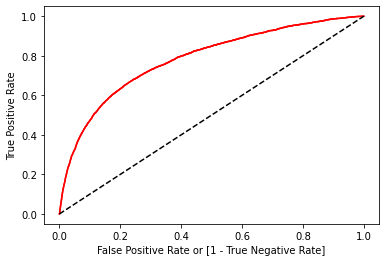

auc accuracy:  0.5651959234100749


In [60]:
fpr,tpr,thresholds=roc_curve(y,log_model.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy: ',auc)

#### 9. Model deployment

In [44]:
from pickle import dump

In [45]:
dump(log_model,open('deposit_data_model.pkl','wb'))

In [46]:
from pickle import load

In [47]:
loaded_pkl_file = load(open('deposit_data_model.pkl','rb'))

In [48]:
predicted_answers = loaded_pkl_file.predict(X_test)

In [49]:
accuracy_score(y_test,predicted_answers)

0.8899701426517749

#### End of Cycle !!!
